<a href="https://colab.research.google.com/github/LauraCatarina/MBA-Ciencia-de-Dados/blob/main/Mat%C3%A9ria%3A%20An%C3%A1lise%20Preditiva%20e%20Data%20Mining/Classifica%C3%A7%C3%A3o_%C3%81rvore_x_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Acurácia: 0.7391304347826086

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.65      0.79      0.71        75
           1       0.83      0.71      0.76       109

    accuracy                           0.74       184
   macro avg       0.74      0.75      0.74       184
weighted avg       0.75      0.74      0.74       184


Matriz de Confusão:
[[59 16]
 [32 77]]


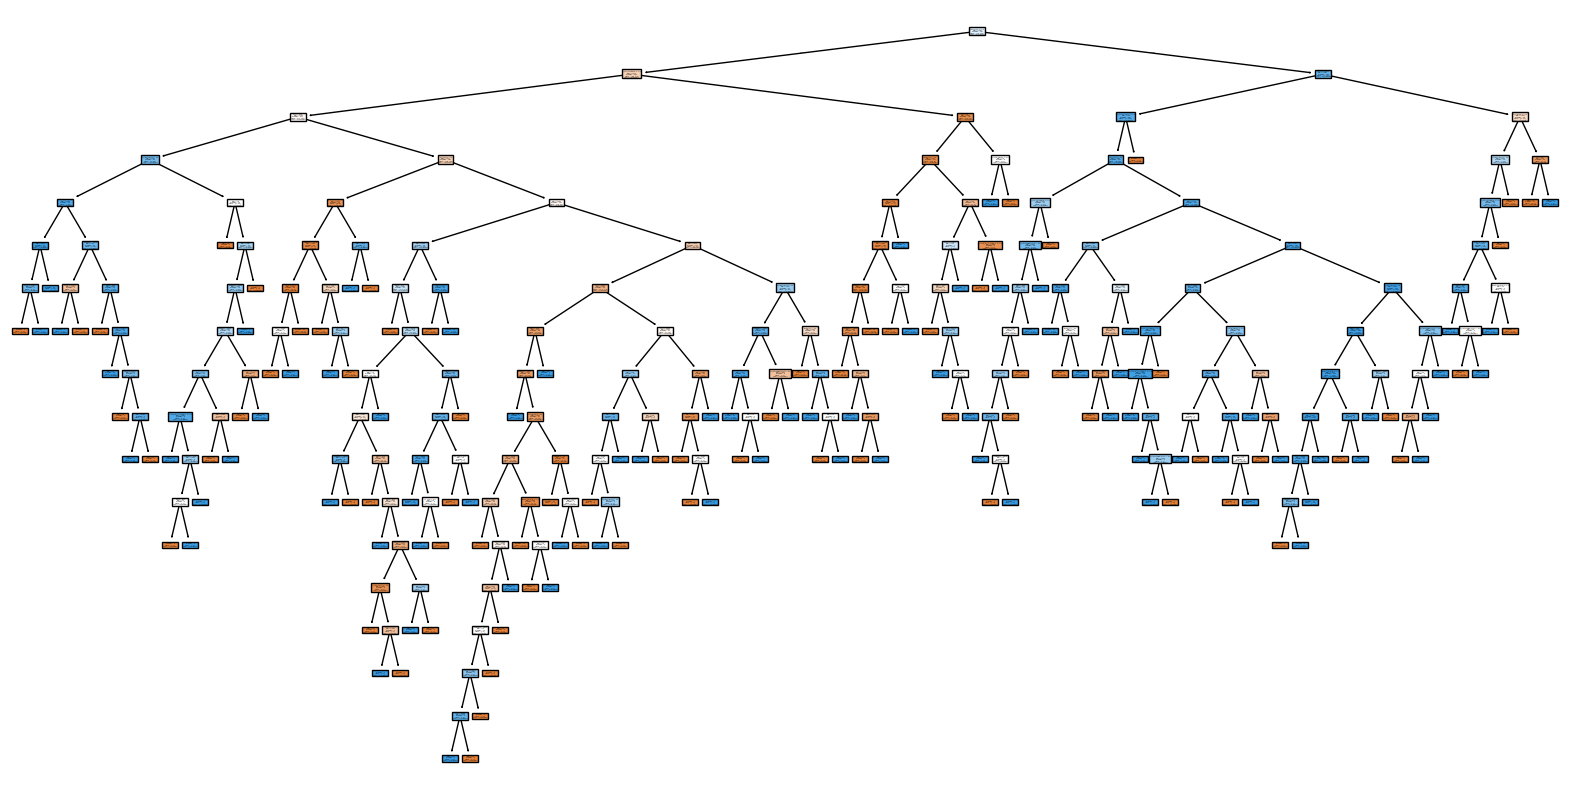

Acurácia do Random Forest: 0.8478260869565217

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        75
           1       0.89      0.84      0.87       109

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184


Matriz de Confusão:
[[64 11]
 [17 92]]


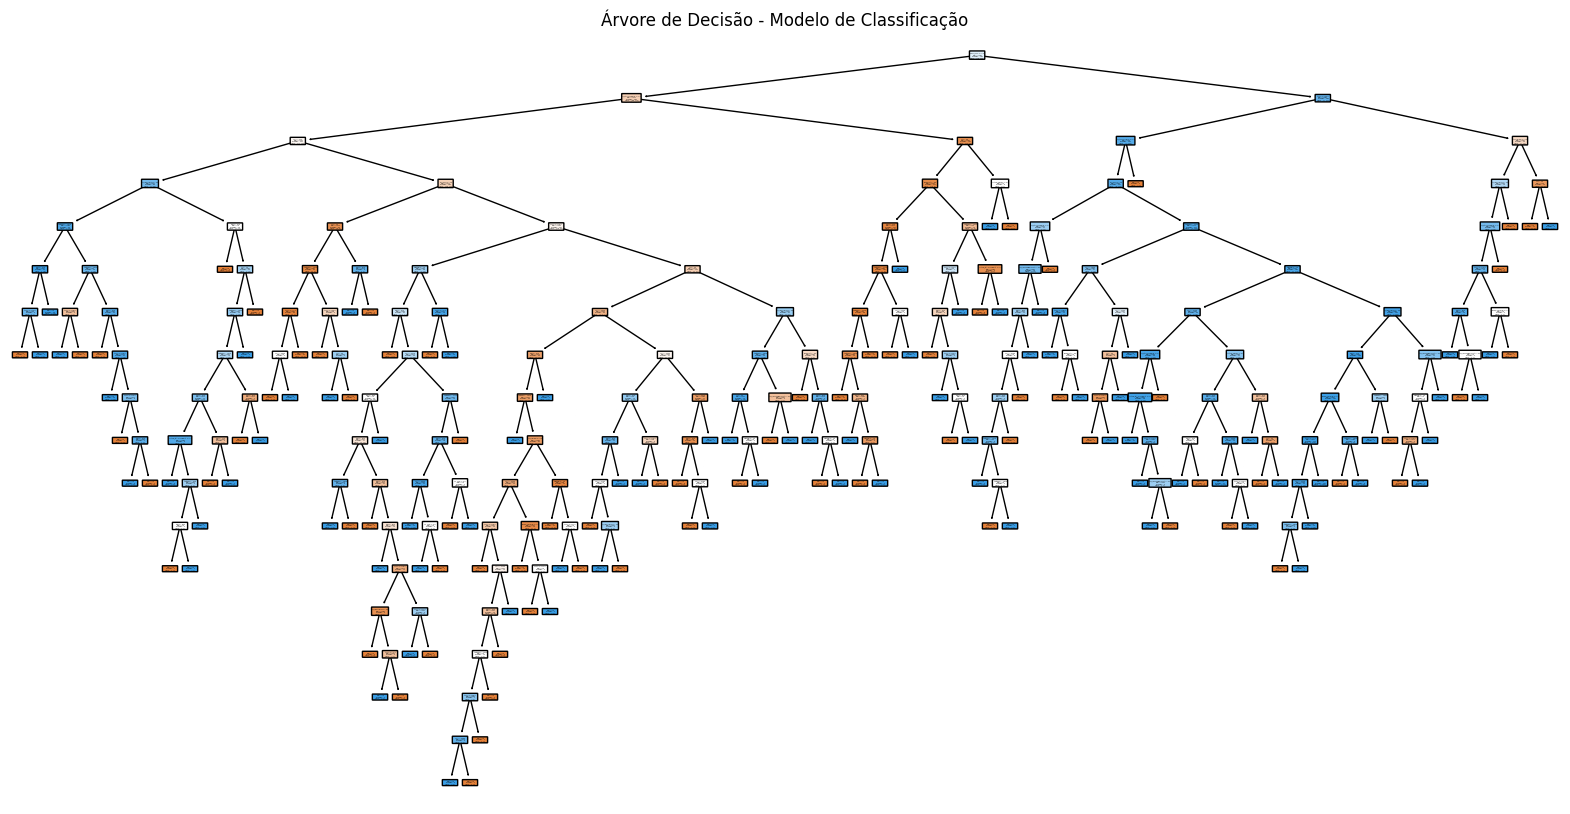

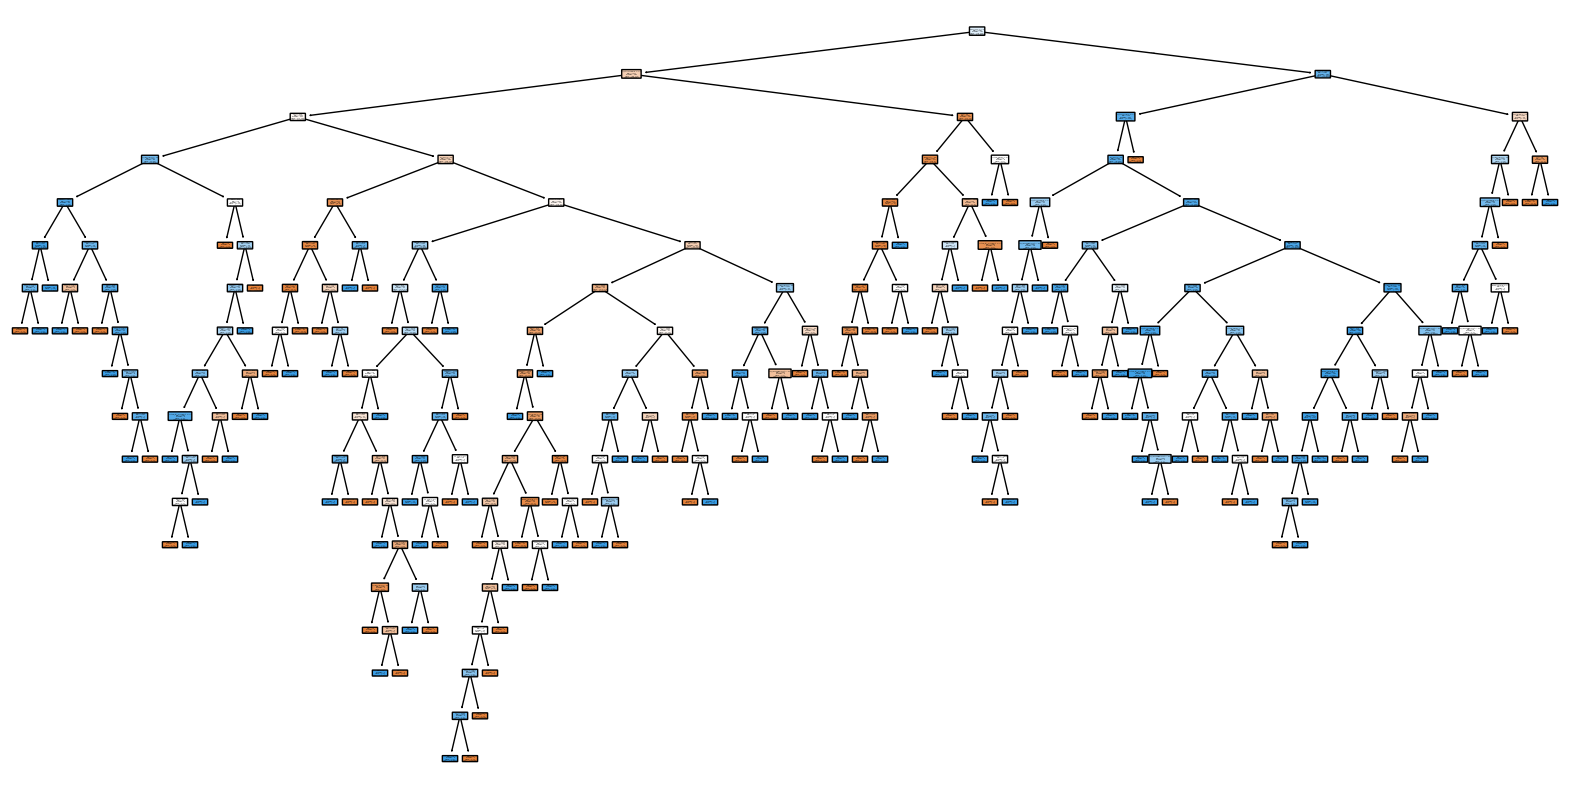

In [ ]:
# Etapa 1 - Importação das bibliotecas
import pandas as pd

# Etapa 2 - Carregamento do dataset e Visualização inicial
df = pd.read_csv('/content/heart_disease_uci.csv')


# Transformando o alvo para 0 (sem doença) e 1 (com doença)
df['target'] = df['num'].apply(lambda x: 1 if x > 0 else 0)
# Visualização da nova coluna
# df['target'].value_counts()

#Verificar se há valores nulos
df.isnull().sum()

# Verificar quais valores diferentes existem na coluna
# df['dataset'].unique()

#Remover colunas desnecessárias
df.drop(['id', 'dataset', 'num'], axis=1, inplace=True)

# Modelos de machine learning (como árvores, redes neurais, etc.) só entendem números. Então onde tem texto, precisa ser transformado em número.
df_encoded = pd.get_dummies(df, drop_first=True)
#Converter True/False para 1/0
df_encoded = df_encoded.fillna(0)
df_encoded = df_encoded.astype(int)

#Verificar se deu certo
df_encoded.head()

#df.head() #Visualizar toda a tabela

# Separar treino e teste
# Importa a função train_test_split da biblioteca scikit-learn.
# Essa função é usada para dividir seus dados em duas partes:
# Conjunto de treino: para o modelo aprender.
# Conjunto de teste: para avaliar o desempenho em dados novos.
from sklearn.model_selection import train_test_split

# Separar variáveis preditoras e alvo
# Cria a variável X, que representa os dados de entrada (features ou variáveis preditoras).
# Você está removendo a coluna target, que é o que o modelo deve prever.
X = df_encoded.drop('target', axis=1)
#Cria a variável y, que contém a variável de saída (ou resposta) — nesse caso, 0 (sem doença) ou 1 (com doença).
y = df_encoded['target']

# Dividir em treino e teste (dados: 20% para teste e 80% para treino)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento e Avaliação de uma Árvore de Decisão
# Importar, treinar e fazer previsões
from sklearn.tree import DecisionTreeClassifier #Essa classe é usada para criar modelos de árvore de decisão, que aprendem regras de decisão para classificar dados com base nas entradas
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #funções que ajudam a avaliar a performance do modelo

# Criar o modelo
model = DecisionTreeClassifier(random_state=42)

# Treinar o modelo/ Aprende padrões para prever a doença com base nos dados.
model.fit(X_train, y_train) #Treina o modelo (fit = “ajustar”) usando os dados de treino: X_train = características dos pacientes / y_train = se tinham doença ou não

# Fazer previsões com o conjunto de teste
y_pred = model.predict(X_test) #Usa o modelo treinado para fazer previsões nos dados de teste (X_test), que ele nunca viu antes.

# Acurácia (porcentagem de acertos)
print("Acurácia:", accuracy_score(y_test, y_pred))

# Relatório detalhado: precisão, recall, F1-score
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


import joblib

# Salvar o modelo treinado
joblib.dump(model, 'modelo_arvore_decisao.pkl')

from sklearn.metrics import classification_report

# Salvar acurácia
with open("acuracia.txt", "w") as f:
    f.write(f"Acurácia: {accuracy_score(y_test, y_pred)}\n")

# Salvar relatório
with open("relatorio_classificacao.txt", "w") as f:
    f.write(classification_report(y_test, y_pred))

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Sem doença', 'Com doença'], filled=True)
plt.savefig("arvore_decisao.png")  # Salva imagem
plt.show()



# Testando outro modelo: Random Forest
from sklearn.ensemble import RandomForestClassifier # ensemble significa que o modelo combina várias árvores. Em vez de usar uma única árvore de decisão, ele cria várias e toma a decisão por votação.

# Criar o modelo
rf_model = RandomForestClassifier(random_state=42)

# Treinar o modelo
rf_model.fit(X_train, y_train)

# Fazer previsões
rf_pred = rf_model.predict(X_test)

# Avaliação
print("Acurácia do Random Forest:", accuracy_score(y_test, rf_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, rf_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, rf_pred))

plt.figure(figsize=(20,10))  # Tamanho da imagem
plot_tree(
    model,  # modelo de árvore treinado
    feature_names=X.columns,  # nomes das colunas (entradas)
    class_names=['Sem doença', 'Com doença'],  # nomes das classes
    filled=True,  # preenche os blocos com cores
    rounded=True  # cantos arredondados para estética
)
plt.title("Árvore de Decisão - Modelo de Classificação")
plt.show()

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=X.columns, class_names=['Sem doença', 'Com doença'], filled=True, rounded=True)
plt.savefig("arvore_decisao2.png")  # Salva no Colab
plt.show()



